In [99]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense,Input


In [100]:
dataset = pd.read_csv('dataset/hypothyroid.csv')
dataset.head()

,Age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [101]:
dataset.columns

Index(['Age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [102]:
dataset = dataset.rename(columns={"binaryClass": "target"})

In [103]:
dataset["target"].value_counts()

target
P    3481
N     291
Name: count, dtype: int64

In [104]:
dataset["target"] = dataset["target"].map({"P": 1, "N": 0})

In [105]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 pregnant
f    3719
t      53
Name: count, dtype: int64


In [106]:
print("Unique categories in the column 'T3 measured'", dataset['T3 measured'].unique())
print("Count of categories in the column 'T3 measured' \n", dataset["T3 measured"].value_counts())

Unique categories in the column 'T3 measured' ['t' 'f']
Count of categories in the column 'T3 measured' 
 T3 measured
t    3003
f     769
Name: count, dtype: int64


In [107]:
print("Unique categories in the column 'Gender'", dataset['sex'].unique())
print("Count of categories in the column 'Gender' \n", dataset["sex"].value_counts())

Unique categories in the column 'Gender' ['F' 'M' '?']
Count of categories in the column 'Gender' 
 sex
F    2480
M    1142
?     150
Name: count, dtype: int64


In [108]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

In [109]:
dataset.head()

,Age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,41,1,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,1
1,23,1,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,1
2,46,0,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,1
3,70,1,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,1
4,70,1,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,1


In [110]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    dataset.replace(to_replace='?', inplace=True, value=np.NaN)

In [111]:
dataset.isnull().sum()

Age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
target        

In [112]:
dataset.drop('TBG', axis = 1, inplace=True)

In [113]:
columns = dataset.columns[dataset.dtypes.eq('object')]
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

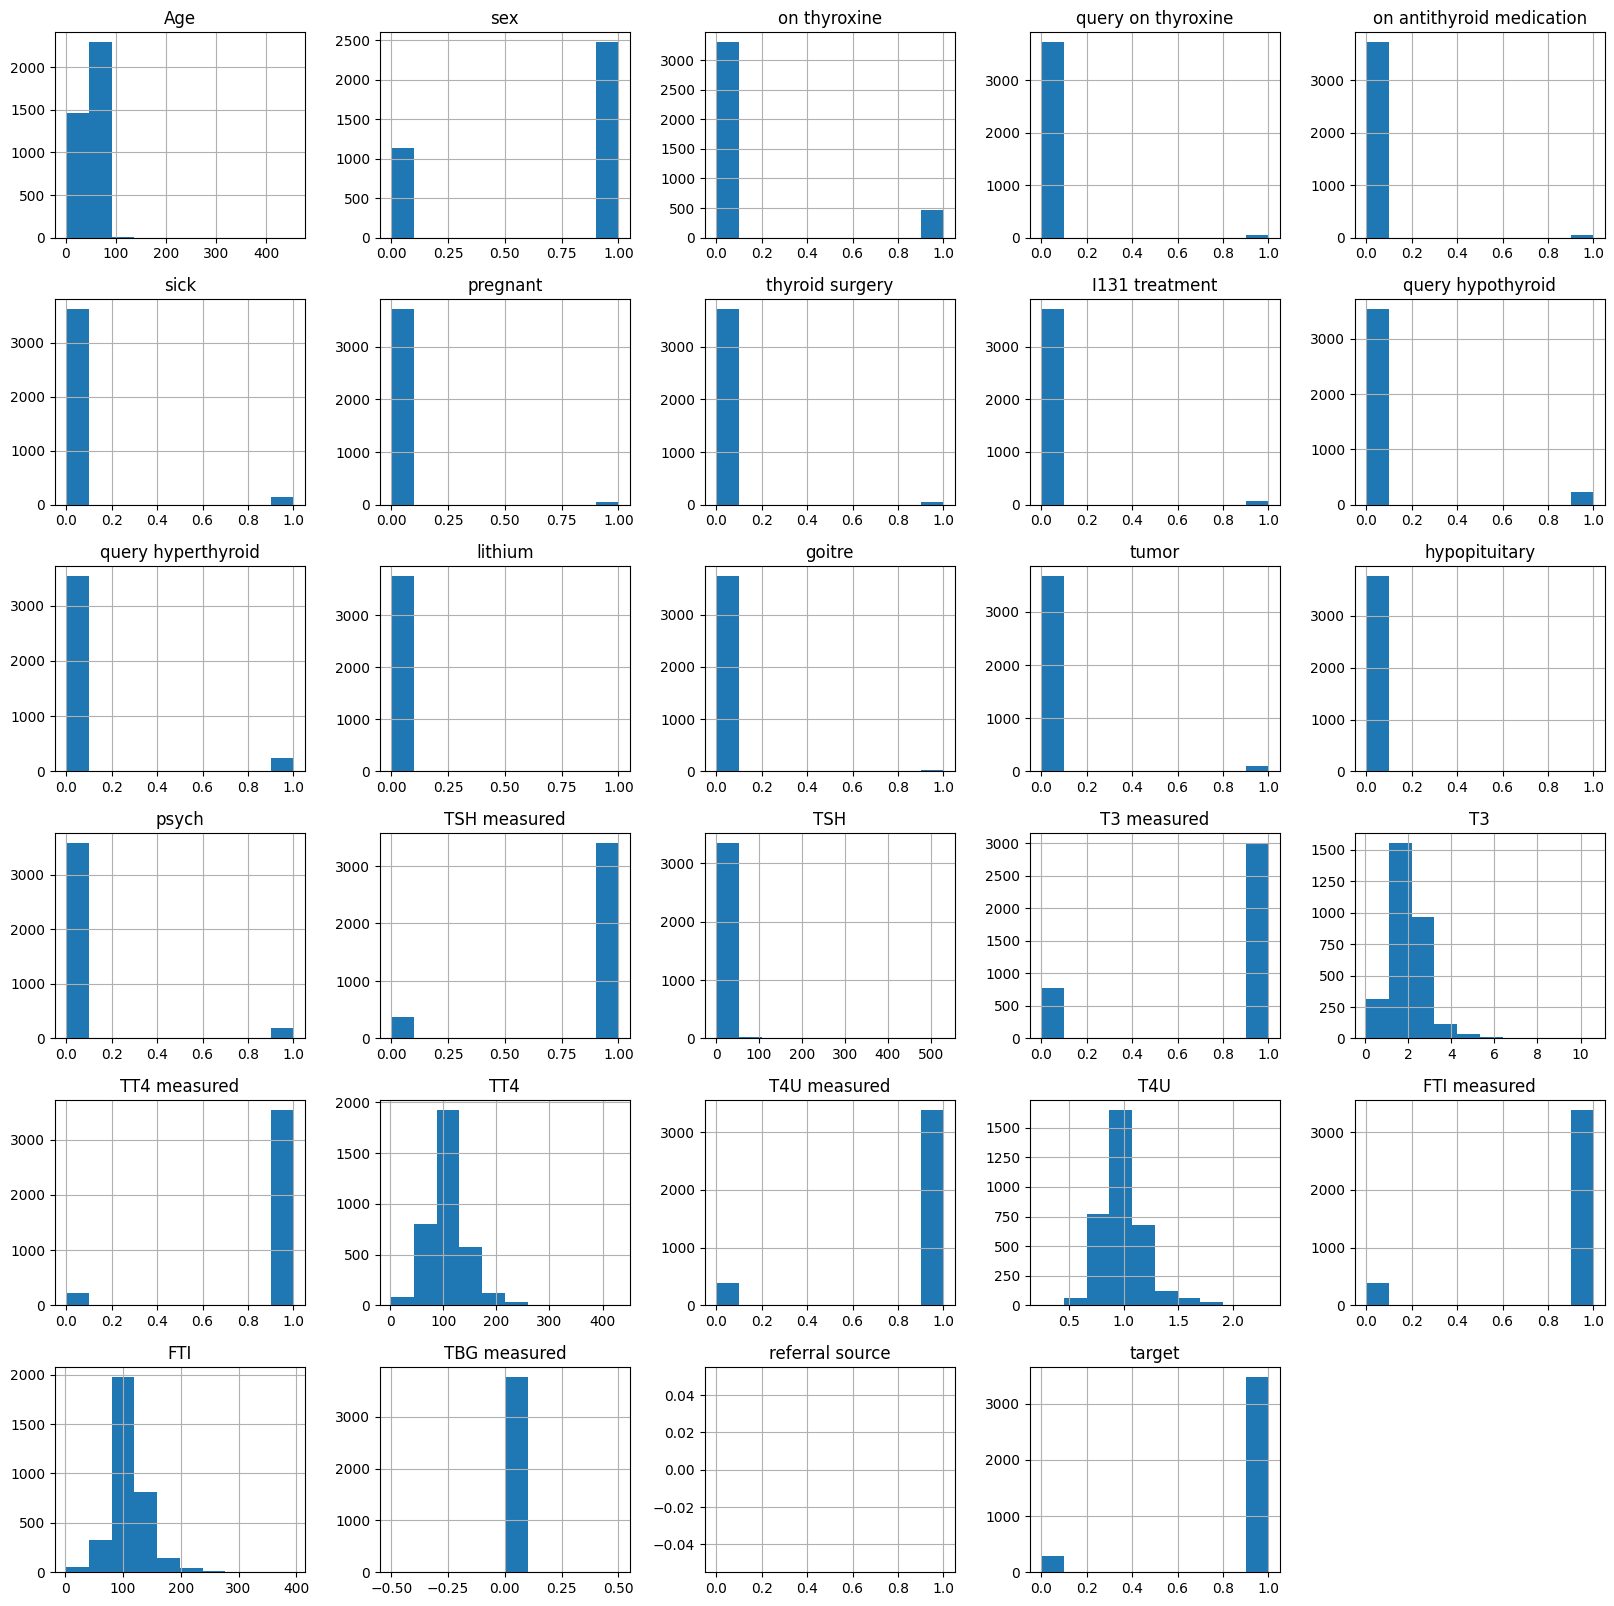

In [115]:
dataset.hist(figsize = (20,20));

In [116]:
dataset.columns[dataset.isnull().any()].tolist()

['Age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral source']

In [117]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['T4U'] = dataset['T4U'].fillna(dataset['T4U'].mean())
dataset['TSH'] = dataset['TSH'].fillna(dataset['TSH'].mean())
dataset['T3'] = dataset['T3'].fillna(dataset['T3'].median())
dataset['TT4'] = dataset['TT4'].fillna(dataset['TT4'].median())
dataset['FTI'] = dataset['FTI'].fillna(dataset['FTI'].median())
dataset['sex'] = dataset['sex'].fillna(0)
dataset['referral source'] = dataset['referral source'].fillna(0)



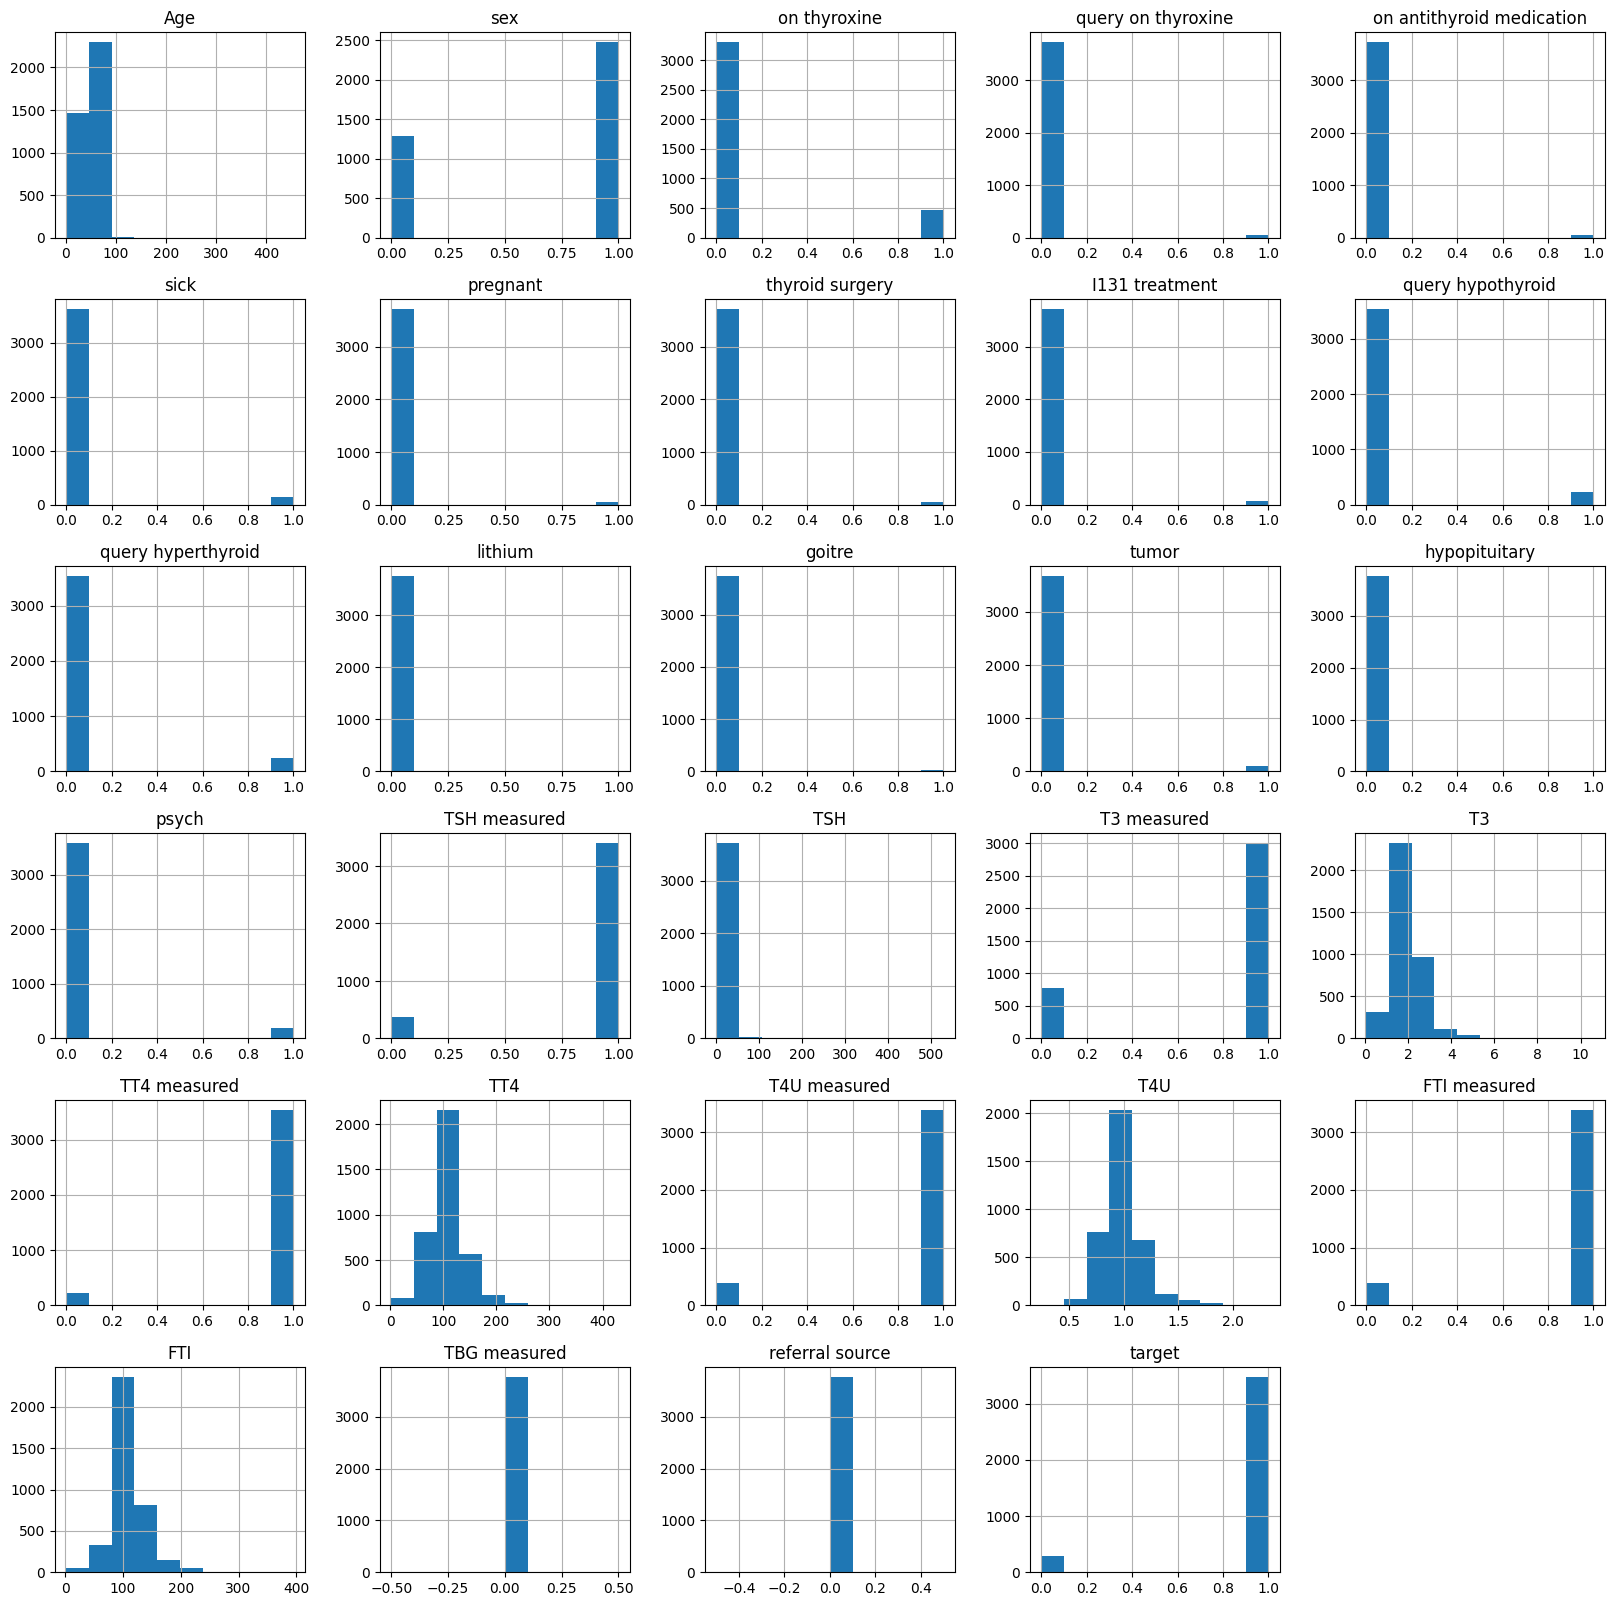

In [118]:
plot_cleaned = dataset.hist(figsize = (20,20))

In [119]:
dataset.isnull().sum()

Age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
target                       0
dtype: int64

In [120]:
X = dataset.drop('target', axis = 1) 
y = dataset['target']

In [121]:
print(X.shape, y.shape)

(3772, 28) (3772,)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
model = Sequential()
model.add(Input(shape=(28,)))  # Replace input_dim=24 with Input layer

# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))

# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/100
61/61 - 3s - 42ms/step - accuracy: 0.8968 - loss: 0.6010 - val_accuracy: 0.9156 - val_loss: 0.4698
Epoch 2/100
61/61 - 0s - 6ms/step - accuracy: 0.9279 - loss: 0.3293 - val_accuracy: 0.9222 - val_loss: 0.2452
Epoch 3/100
61/61 - 0s - 7ms/step - accuracy: 0.9337 - loss: 0.1999 - val_accuracy: 0.9255 - val_loss: 0.1936
Epoch 4/100
61/61 - 0s - 7ms/step - accuracy: 0.9436 - loss: 0.1682 - val_accuracy: 0.9421 - val_loss: 0.1726
Epoch 5/100
61/61 - 0s - 8ms/step - accuracy: 0.9465 - loss: 0.1524 - val_accuracy: 0.9437 - val_loss: 0.1586
Epoch 6/100
61/61 - 1s - 8ms/step - accuracy: 0.9519 - loss: 0.1419 - val_accuracy: 0.9454 - val_loss: 0.1501
Epoch 7/100
61/61 - 1s - 8ms/step - accuracy: 0.9540 - loss: 0.1329 - val_accuracy: 0.9454 - val_loss: 0.1430
Epoch 8/100
61/61 - 0s - 7ms/step - accuracy: 0.9552 - loss: 0.1253 - val_accuracy: 0.9470 - val_loss: 0.1371
Epoch 9/100
61/61 - 0s - 7ms/step - accuracy: 0.9569 - loss: 0.1191 - val_accuracy: 0.9503 - val_loss: 0.1300
Epoch 10/

In [130]:
loss, acc = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9891 - loss: 0.0283
loss: 2.98%
compile_metrics: 99.07%


In [131]:
y_pred = model.predict(X_test).round()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [132]:
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

F1-score: 99.50%
Recall: 99.71%
Precision: 99.29%


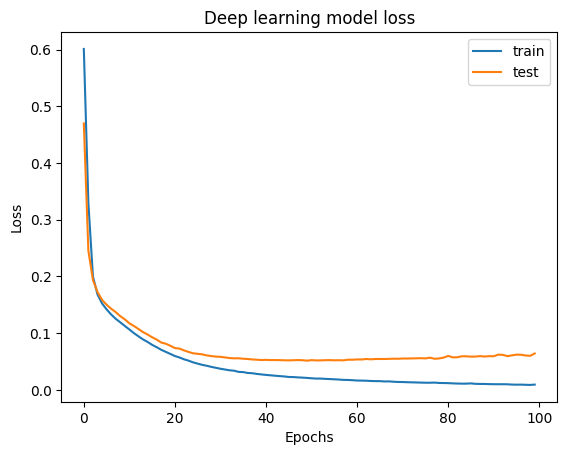

In [133]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Deep learning model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [135]:
model.save('model.keras')